<a href="https://colab.research.google.com/github/brunoxti/MachineLearning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report




In [ ]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

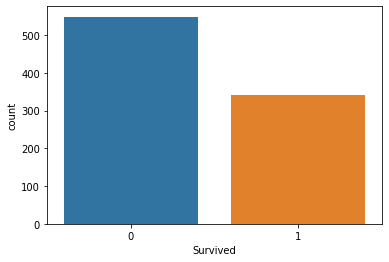

In [ ]:
sb.countplot(x='Survived', data=titanic)

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


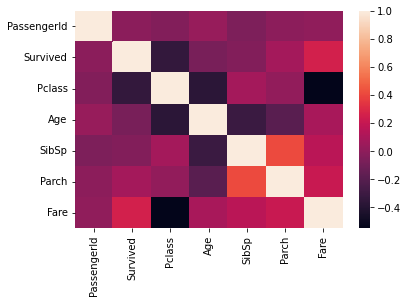

In [ ]:
sb.heatmap(titanic.corr())

In [ ]:
titanic_data = titanic.drop(['PassengerId','Name','Cabin','Ticket'], 1)
titanic_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


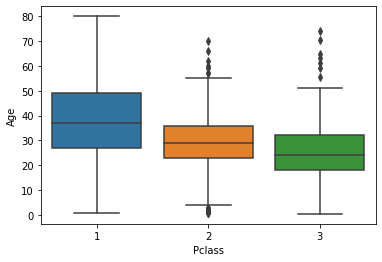

In [ ]:
sb.boxplot(x='Pclass', y='Age', data=titanic_data)

In [ ]:
#Criar uma função que nos permite fazer a inserção de valores de idade

def age_approx(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 38
    elif Pclass == 2:
      return 29
    else:
      return 25
  else:
    return Age

In [ ]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)

In [ ]:
titanic_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Embarked
0       False   False  False  False  False  False  False     False
1       False   False  False  False  False  False  False     False
2       False   False  False  False  False  False  False     False
3       False   False  False  False  False  False  False     False
4       False   False  False  False  False  False  False     False
..        ...     ...    ...    ...    ...    ...    ...       ...
886     False   False  False  False  False  False  False     False
887     False   False  False  False  False  False  False     False
888     False   False  False  False  False  False  False     False
889     False   False  False  False  False  False  False     False
890     False   False  False  False  False  False  False     False

[891 rows x 8 columns]>

In [ ]:
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#One Hot Ecoding (Dummty Variables)

gender = pd.get_dummies(titanic_data['Sex'], drop_first=True)
embark_location = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
gender.head()



,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
titanic_data.drop(['Sex','Embarked'],1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [ ]:
titanic_dmy = pd.concat([titanic_data, gender, embark_location], axis=1)
titanic_dmy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [ ]:
titanic_dmy.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
male          uint8
Q             uint8
S             uint8
dtype: object

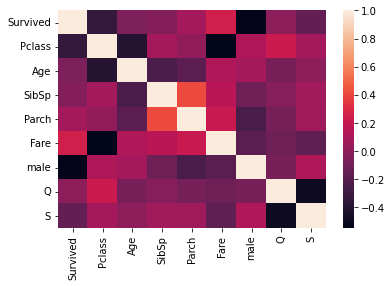

In [ ]:
sb.heatmap(titanic_dmy.corr())

In [ ]:
titanic_dmy.drop(['Pclass'], axis=1, inplace=True)
titanic_dmy.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,male,22.0,1,0,7.2500,S,1,0,1
1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,female,26.0,0,0,7.9250,S,0,0,1
3,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,male,35.0,0,0,8.0500,S,1,0,1


In [ ]:
X = titanic_data.iloc[:[1,2,3,4,5,6,7]].values
y = titanic_data.iloc[:,0].values

TypeError: ignored

In [ ]:
# Divisão amostral
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)


In [ ]:
#Criação do nosso modelo

clf = MLPClassifier()
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predct(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))